<h1 style="text-align:center">Reconhecimento de Padrões</h1>
<h3 style="text-align:center">João Victor Duarte Viana</h3>

<p><b>Resumo</b>: Em <i>Machine Learning</i>, existem categorias em relação ao tipo do problema a ser resolvido. Neste trabalho será utilizado apenas dois, o de Regressão e de Classificação. A primeira parte deste trabalho será para analisar os modelos de Classificação e determinar qual deles tem o melhor desempenho em relação a acurácia para a base de dados (nome da bd), a saber, os modelos serão:</p>
    <ul>
        <li><b>Naivy Bayes</b></li>
        <li><b>Regressão Logística</b></li>
        <li><b>SVM Linear</b></li>
        <li><b>Kernel SVM</b></li>
    </ul>

<p>A segunda parte do projeto é analisar qual modelo de Regressão mais se aproxima gráficamente da função original. Os modelos que serão utilizados serão:</p>
    <ul>
        <li><b>Regressão Linear</b></li>
        <li><b>Regressão Linear com Kernel RBF</b></li>
    </ul>

<h5>Bibliotecas utilizadas neste projeto</h5>
<ul>
    <li>Numpy</li>
    <li>Pandas</li>
    <li>Matplotlib</li>
    <li>CVXOPT</li>
    <li>Math</li>
    <li>Time</li>
</ul>

In [2]:
from cvxopt import matrix
from cvxopt import spmatrix
from cvxopt.solvers import qp 
from cvxopt import solvers

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import time

In [3]:
solvers.options["show_progress"] = False

<h3 style="text-align:center">Modelos de Classificação</h3>

<h5>Métodos auxiliares</h5>

Descrição de cada método auxiliar
<ul>
    <li>class_encode(specie, column, values_y): Método para transforma as labels da base de dados iris
        <ul>
            <li><i>specie</i>: label que será transformada;</li>
            <li><i>column</i>: Nome da espécie da iris que sera classificada</li>
            <li><i>values_y</i>: Lista dos valores que a label receberá, se a <i>specie</i> for igual a <i>column </i> retornará o segundo valor de <i>values_y</i>, caso contrário, retornará o primeiro.</li>
        </ul>
    </li><br>
    <li>normalize(data): Método para normalizar a base de dados
        <ul><li><i>data</i>: Base de dados</li></ul>
    </li><br>
    <li>train_test(data, class_d): Método para separar a base de dado em treino e teste. Foi utilizado a divisão 80/20, ou seja, 80% da base de dados é para treino, e 20% para teste.
        <ul>
            <li><i>data</i>: Base de dados;</li>
            <li><i>class_d</i>: Vetor de labels.</li>
        </ul>
    </li><br>
    <li>metrics(modelo, num_realizacoes, db, class_db, specie, list_y): Método para medir a média da acurácia de algum modelo de classificação binária. 
        <ul>
            <li><i>modelo</i>: Modelo de classificação binária que será utilizado;</li>
            <li><i>num_realizacoes</i>: Quantidade de vezes que vai ser computado a acurácia do modelo;</li>
            <li><i>db</i>: Base de dados;</li>
            <li><i>class_db</i>: Vetor de labels;</li>
            <li><i>specie</i>: Nome da espécie que será classificada;</li>
            <li><i>list_y</i>: Lista de valores de y que será utilizado para transformar as labels.</li>
        </ul>
    </li><br>
    <li>test_model(modelo, db, class_db, specie, list_y): Método para testar um modelo predizendo 3 padrões da base de dados, a saber são: o 1º, o 51º e o 100º.
        <ul>
            <li><i>modelo</i>: Modelo de classificação binária que será utilizado;</li>
            <li><i>db</i>: Base de dados;</li>
            <li><i>class_db</i>: Vetor de labels;</li>
            <li><i>specie</i>: Nome da espécie que será classificada;</li>
            <li><i>list_y</i>: Lista de valores de y que será utilizado para transformar as labels.</li>
        </ul>
    </li>
</ul>

In [4]:
def class_encode(specie,column,values_y):
    if column in specie:
        return values_y[1]
    else:
        return values_y[0]

In [5]:
def normalize(data):
    for col in data.columns:
        min = np.min(data[col])
        max = np.max(data[col])
        data[col] = [(data.at[i,col] - min)/(max-min)
                        for i in range(len(data))]
    return data


In [6]:
def train_test(data, class_d):
    train_x, test_x = _split_data_(data)
    train_d = class_d.iloc[train_x.index]
    test_d = class_d.drop(train_d.index)
    return train_x,test_x,train_d,test_d

def _split_data_(data):
    index_random = _random_index_(data,0.8)
    return data.loc[index_random],data.drop(index_random)

def _random_index_(data,count):
    random_count = int(len(data) * count)
    return np.random.choice(data.index,random_count,replace = False)


In [7]:
def metrics(modelo, num_realizacoes, db, class_db, specie, list_y):
    inicio_tempo = time.time()
    species = class_db.apply(class_encode,column=specie,values_y=list_y)
    lista_acuracia = []
    for realizacao in range(num_realizacoes):
        train_x, test_x, train_y, test_y = train_test(db, species)
        modelo.train(train_x,train_y)
        list_y = [modelo.predict(list(linha)) for indice, linha in test_x.iterrows()]
        lista_acuracia += [np.mean(list_y == test_y)]
    print("Toda o processo durou: {:.3f}s".format(time.time() - inicio_tempo))
    return np.mean(lista_acuracia)

In [8]:
def test_model(modelo, db, class_db, specie, list_y):
    species = class_db.apply(class_encode,column=specie,values_y=list_y)
    train_x, test_x, train_y, test_y = train_test(db, species)
    modelo.train(train_x,train_y)
    teste_1 = modelo.predict(db.loc[0])
    teste_2 = modelo.predict(db.loc[51])
    teste_3 = modelo.predict(db.loc[100])
    return "valor da setosa = {}, valor da versicolor = {}, valor da virginica = {}".format(teste_1,teste_2,teste_3)

<h5>Obtendo os dados</h5>

In [9]:
iris_db = pd.read_csv("iris.csv")
iris_db.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<h5>Pré-processamento dos dados</h5>

In [10]:
species = iris_db.species
iris_db = iris_db.drop(['species'],axis=1)

In [11]:
iris_db.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
species.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: species, dtype: object

In [12]:
iris_db = normalize(iris_db)
iris_db

,sepal_length,sepal_width,petal_length,petal_width
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


<h5>Naive Bayes Gaussiano</h5>
<p>O primeiro modelo de Classificação que será analisado é o Naive Bayes Gaussiano. Em Machine Learning, classificadores naive bayes são uma família de classificadores probabilisticos baseados no teorama Bayesiano, assumindo que há uma forte independencia entre as <i>features</i> da base de dados. Este modelo utilizado a seguinte equação para prever a probabilidade que um determinado padrão tem para todos os possiveis y's, retornando aquele que possui a maior probabilidade:</p>
$${\displaystyle {\hat {y}}={\underset {k\in \{1,\dots ,K\}}{\operatorname {argmax} }}\ p(y_{k})\displaystyle \prod _{i=1}^{n}p(x_{i}\mid y_{k}).}$$
<p>onde, $y_{k}$ é a label de $x_{k}$. No processo de treinamento para obter o $p(x\mid y)$, quando os dados são contínuos, é necessário utilizar uma função gaussiana de acordo com a seguinte equação:</p>
$${\displaystyle p(x=v\mid y_{k})={\frac {1}{\sqrt {2\pi \sigma _{k}^{2}}}}\,e^{-{\frac {(v-\mu _{k})^{2}}{2\sigma _{k}^{2}}}}}$$
<p>onde v é o padrão que possui valores contínuos, $\sigma _{k}^{2}$ é a variancia da classe $y_{k}$ e $\mu _{k}$ é a sua média.</p>
<p>A seguir está o algoritmo da implementação:</p>

NaiveBayesGaussian:
<ul>
    <li>train(db, class_db):</li>
    <ul>
        <li>Computa a probabilidade de cada y de acordo com a base de dados</li>
        <li>Computa o desvio padrão de cada y</li>
        <li>Computa a média de cada y</li>
    </ul>
    <li>predict(x):</li>
    <ul>
        <li>Aplica as equações para encontrar a probabilidade de cada y; </li>
        <li>Retorna o y que possui a maior probabilidade</li>
    </ul>
</ul>

In [13]:
class NaivyBayesGaussian:
    __slots__ = ['probabilidade_y','lista_desvio_padrao','lista_media']
    
    def __init__(self):
        self.probabilidade_y = [0,0]
        self.lista_desvio_padrao = []
        self.lista_media = []        
            
    def train(self, db, class_db):
        self.lista_desvio_padrao = np.zeros((2, db.shape[1]))
        self.lista_media = np.zeros((2, db.shape[1]))
        
        for y in range(2):
            self.probabilidade_y[y] = len(class_db.loc[class_db == y])
            index_db = class_db.loc[class_db == y].index
            for num_column in range(len(db.columns)):
                column = db.columns[num_column]
                self.lista_desvio_padrao[y][num_column] = np.std(db[column].loc[index_db])
                self.lista_media[y][num_column] = np.mean(db[column].loc[index_db])        
       
    def probabildade_x_y(self,x, y):
        resultado = 1
        for num_column in range(len(x)):
            std = self.lista_desvio_padrao[y][num_column]
            mean = self.lista_media[y][num_column]
            resultado *= ((1/(math.sqrt(2*math.pi)*std))*(math.exp((-(x[num_column]-mean)**2)/(2*(std**2)))))
        return resultado
    
    def arg_max(self,lista_probabilidades):
        for i in range(len(lista_probabilidades)):
            if lista_probabilidades[i] == np.max(lista_probabilidades):
                return i
    
    def predict(self,x):
        lista_probabilidades = []
        for y in range(len(self.probabilidade_y)):
            lista_probabilidades += [self.probabilidade_y[y] * self.probabildade_x_y(x,y)]
        return self.arg_max(lista_probabilidades)

In [14]:
naivy = NaivyBayesGaussian()

In [15]:
test_model(naivy, iris_db, species, "setosa", [0,1])

'valor da setosa = 1, valor da versicolor = 0, valor da virginica = 0'

In [16]:
metrics(naivy, 20, iris_db, species, "setosa", [0,1])

Toda o processo durou: 0.486s


1.0

In [17]:
metrics(naivy, 20, iris_db, species, "versicolor", [0,1])

Toda o processo durou: 0.481s


0.9049999999999999

In [23]:
metrics(naivy, 20, iris_db, species, "virginica", [0,1])

Toda o processo durou: 0.494s


0.9283333333333333

<h5>Regressão Logistica</h5>

<i>Ver nota de aula sobre Regressão Logística</i>

In [24]:
class RegressaoLogistica:
    _slots__ = ['w']
    
    def __init__(self):
        self.w = []
    
    def train(self, db, class_db, epocas=100, taxa_de_aprendizagem=0.001):
        self.w = np.zeros((1, db.shape[1] + 1))
        
        for epoca in range(epocas):
            gradiente = np.zeros((1, db.shape[1] + 1))
            for indice, linha in db.iterrows():
                x = np.array(list(linha) + [-1])
                y = class_db.loc[indice]
                gradiente += ((y*x)/(1+np.exp(y * np.dot(x, self.w.T))))
            valor_w_antigo = self.w
            self.w += taxa_de_aprendizagem*gradiente 
    
    def arg_max(self, probabilidade_menos_1, probabilidade_1):
        return -1 if probabilidade_menos_1 > probabilidade_1 else 1
            
    def predict(self, linha):
        x = np.array(list(linha) + [-1])
        
        probabilidade_menos_1 = (1/(1+np.exp(np.dot(x, self.w.T))))
        probabilidade_1 = (1/(1+np.exp(-np.dot(x, self.w.T))))
        return self.arg_max(probabilidade_menos_1,probabilidade_1)
        

In [25]:
rg = RegressaoLogistica()

In [26]:
test_model(rg,iris_db,species, "setosa", [-1,1])

'valor da setosa = -1, valor da versicolor = -1, valor da virginica = -1'

In [27]:
metrics(rg, 20, iris_db, species, "setosa", [-1,1])

Toda o processo durou: 61.825s


0.9183333333333333

In [28]:
metrics(rg, 20, iris_db, species, "versicolor", [-1,1])

Toda o processo durou: 60.048s


0.6483333333333332

In [32]:
metrics(rg, 20, iris_db, species, "virginica", [-1,1])

Toda o processo durou: 59.924s


0.8083333333333333

<h5>SVM Linear</h5>
<p>Diferentemente do Perceptron, que encontra um hiperplano separador 1 qualquer (caso exista), SVM retorna o hiperplano separador de margem máxima. SVMs são normalmente aplicados em tarefas de classificação binária. A função de decisão obtida com SVMs é da forma:</p><br>
$$h(x) = sign(w^t x + b)$$<br>
<p>em que w e b representam os parâmetros do SVM. Aqui adotaremos os valores {+1, −1} para representar os rótulos de cada classe.</p>
<h5>Linearmente separável</h5>
<p>Um conjunto de dados $D = (x_1 , y_1 ), . . . , (x_n , y_n)$, com $x_i ∈
R^d e y_i ∈ (+1, −1)$, é dito linearmente separável se existe um hiperplano $(x | w^t x + b = 0)$
parametrizado por (w, b) tal que
$$y_i = sign(w^t x_i + b) \hspace{1cm}   i = 1, . . . , n,$$
ou, de modo equivalente,
$$y_i (w^t x_i + b) ≥ 0 \hspace{1cm}   i = 1, . . . , n.$$
<p>O treinamento do SVM consiste em encontrar o hiperplano separador de margem máxima. Matematicamente isso corresponde ao seguinte problema de otimização:</p>
$${\underset {w,b}{\operatorname {min}} } \hspace{0.2cm} w^t x$$
$$s.t \hspace{0.3cm} y_i (w^t x_i + b) ≥ 1 \hspace{1cm} i = 1, . . . , n.$$<br>
<h5>Soft-SVM</h5>
<p>O que acontece com o problema de otimização do SVM quando os dados não são linearmente separáveis? Não existe solução, o problema é inviável. Para lidar com esses casos, uma solução é introduzir variáveis de folga (não negativas) que permitam as restrições serem violadas (ou seja, $y_i (w^t x_i + b) < 1$. Isso corresponde a permitir que alguns pontos fiquem mais próximos do hiperplano separador, ou até do lado errado do hiperplano.
Isso é compensado através de uma penalidade na função custo, forçando que essas variáveis de folga tenham valores baixos. Com isso, temos a formulação soft-margin do SVM:</p>
$${\underset {w,b,ξ_i} {\operatorname {min} \hspace{0.2cm}}} w^t x  + C \sum_{i=1}^n ξ_i$$
$$s.t \hspace{0.3cm} y_i (w^t x_i + b) ≥ 1 − ξ_i \hspace{1cm} i = 1, . . . , n. $$
$$ξ_i ≥ 0 \hspace{1cm} i = 1, . . . , n$$

<p>A seguir está o algoritmo do Soft-SVM:</p> <br>
<p><i>OBS</i>.: O CVXOPT segue o seguinte formato para modelar problemas quadráticos:</p><br>
$${\operatorname {min}} \hspace{0.2cm} \frac{1}{2}x^t P x + q^t x$$
$$ s.t \hspace{0.3cm} Gx \le h$$
<p>Exemplo: Tomando dois padrões, $[[x1,x2],[x3,x4]$, a matriz P receberá o valor de </p><br>
$$[[1,0,0,0,0], [0,1,0,0,0], [0,0,0,0,0]],$$<br>
<p>sendo sua dimensão</p> <br>
$$dim = nº atributos + nº padrões + 1(b)$$<br> 
<p>e onde a ultima linha da matriz é um vetor de zeros, pois não será utilizado o valor de b da equação citada anteriormente. A matriz q receberá o valor de </p><br>
$$[0,0,0,1,1],$$<br> 
<p>pois é necessário pegar apenas as variáveis de folga. A matriz g receberá o valor de</p><br>
$$[[-x1_1*y_1, -x1_2*y_1,-x1_3*y_1, -1, 0],[-x2_1*y_2, -x2_2*y_2,-x2_3*y_2, 0, -1],[0, 0, 0, -1, 0],[0, 0, 0, 0, -1],].$$<br>
<p>E a matriz h receberá</p><br> 
$$[-1,-1,0,0]$$<br> 
<p>para satisfazer as restrições do modelo.</p><br>
SVMLinear:
<ul>
    <li>train(db, class_db):</li>
    <ul>
        <li>Computa a matriz P</li>
        <li>Computa a matriz Q</li>
        <li>Computa a matriz G</li>
        <li>Computa a matriz H</li>
        <li>Passa todas as matrizes como paramentro do solver <i>qp</i> e retornar o valor do w</li>
    </ul>
    <li>predict(x):</li>
    <ul>
        <li>Aplica a equação $w^T x$ para encontrar o valor de y; </li>
        <li>Retorna 1 caso y  seja maior que 0, caso contrário retorna -1</li>
    </ul>
</ul>

In [33]:
class SVMLinear:
    __slots__ = ['w','p','q','g','h']
    
    def __init__(self):
        self.w = []
        self.p = []
        self.q = []
        self.g = []
        self.h = []
        
    def initParams(self, db, class_db):
        self.w = []
        
        matriz_identidade = np.identity(db.shape[1])
        DIMENSAO = db.shape[0] + db.shape[1] + 1 
        matriz_p = np.zeros((DIMENSAO, DIMENSAO))
        matriz_p[:matriz_identidade.shape[0], :matriz_identidade.shape[1]] = matriz_identidade + matriz_p[:matriz_identidade.shape[0], :matriz_identidade.shape[1]]
        self.p = matrix(matriz_p, tc="d")
        
        matriz_aux_q = np.ones((db.shape[0],1))
        matriz_q = np.zeros((DIMENSAO,1))
        matriz_q[db.shape[1] + 1:,:] = matriz_aux_q + matriz_q[db.shape[1] + 1:,:]
        self.q = matrix(matriz_q)
        
        dados_com_classes = db.join(class_db)
        lista_g = []
        for indice,linha in dados_com_classes.iterrows():
            lista_g += [self.getG(linha, class_db.loc[indice])]
        
        matriz_aux_g = np.array(lista_g)
        matriz_identidade_g = np.identity(db.shape[0]) * (-1)
        DIMENSAO_2 = 2*db.shape[0]
        matriz_g = np.zeros((DIMENSAO_2, DIMENSAO))
        matriz_g[:db.shape[0],:db.shape[1]+1] = matriz_aux_g + matriz_g[:db.shape[0],:db.shape[1]+1]
        matriz_g[:db.shape[0],db.shape[1]+1:] = matriz_identidade_g + matriz_g[:db.shape[0],db.shape[1]+1:]
        matriz_g[db.shape[0]:,db.shape[1]+1:] = matriz_identidade_g + matriz_g[db.shape[0]:,db.shape[1]+1:]
                   
        self.g = matrix(matriz_g, tc="d")
                                                                        
        matriz_h = np.zeros((DIMENSAO_2,1))
        matriz_h[:db.shape[0],:] = np.ones((db.shape[0],1)) * (-1)
        self.h = matrix(matriz_h) 
        
    def getG(self,linha, y):
        x = np.array(list(linha[:-1]) + [1])
        return (x * y).T * -1
    
    def train(self, db, class_db):
        self.initParams(db, class_db)
        s = qp(self.p,self.q,self.g, self.h)
        self.w = s['x']

    def predict(self, linha):
        x = np.array(list(linha) + [1])
        u = np.dot(x,self.w[:x.shape[0]])
        return 1 if u > 0 else -1

In [34]:
svm = SVMLinear()

In [35]:
test_model(svm, iris_db, species, "setosa", [-1,1])

'valor da setosa = 1, valor da versicolor = -1, valor da virginica = -1'

In [36]:
metrics(svm, 20, iris_db, species, "virginica", [-1,1])

Toda o processo durou: 1.781s


0.9533333333333331

In [37]:
metrics(svm, 20, iris_db, species, "setosa", [-1,1])

Toda o processo durou: 1.750s


1.0

In [38]:
metrics(svm, 20, iris_db, species, "versicolor", [-1,1])

Toda o processo durou: 1.609s


0.6916666666666665

<h5>Kernel SVM</h5>
<p>O Kernel SVM utiliza a mesma primícia do SVM, no entanto, ao contrário do SVM Linear que pode ser facilmente obtido na sua forma primal, o Kernel SVM será obtido transformando o problema de forma primal para a forma dual. A equação a seguir demostra a forma dual do SVM:</p><br>
$${\operatorname {max}}\hspace{0.2cm} \sum_{i}\alpha_i - \frac{1}{2}\sum_{jk}\alpha_j\alpha_k y_j y_k (x_j^t x_k).$$
<p>Encontrando na equação o $(x_j^t x_k)$ é possível utilizar algum kernel para que o modelo possa resolver problemas não-lineares. Neste projeto foi utilizado apenas um método de kernel, a saber o RBF, e seu formato é descrito a seguir:</p> <br>
$${\displaystyle K(\mathbf {x} ,\mathbf {z} )=\exp \left(-{\frac {\|\mathbf {x} -\mathbf {z} \|^{2}}{2\sigma ^{2}}}\right)}$$<br>
<p>onde $\sigma ^{2}$ é um parâmetro livre. 

In [39]:
class KernelSVM:
    __slots__ = ['alfa','p','q','g','h','y', 'x', 'beta']
    
    def __init__(self):
        self.alfa = []
        self.p = []
        self.q = []
        self.g = []
        self.h = []
        self.x = []
        self.y = []
        self.beta = 0
        
    def initParams(self, db, class_db, beta):
        self.beta = beta
        self.alfa = []
        x = np.concatenate((db, np.ones((db.shape[0],1)) ), axis=1)
        new_db = pd.DataFrame(x)
        self.x = new_db
        self.y = class_db
        
        kernel = []
        for indice_i, linha_i in self.x.iterrows():
            linha_kernel = []
            for indice_j, linha_j in self.x.iterrows():
                y_1 = class_db.iloc[indice_i]
                y_2 = class_db.iloc[indice_j]
                linha_kernel += [self.kernel_rbf(linha_i, linha_j, beta) * y_1 * y_2 ]
            kernel += [linha_kernel]
        
        
        matriz_p = np.array(kernel)
        self.p = matrix(matriz_p, tc="d")
        
        matriz_q = np.ones((db.shape[0],1)) * (-1)
        self.q = matrix(matriz_q)
                   
        self.g = matrix(np.identity(db.shape[0]) *(-1), tc="d")
                                                                        
        matriz_h = np.zeros((db.shape[0],1))
        self.h = matrix(matriz_h) 
    
    def kernel_rbf(self, x, z, beta):
        return np.exp(-(np.sqrt(np.sum((x-z)**2))/(2*(beta**2))))

        
    def train(self, db, class_db, beta=1):
        self.initParams(db, class_db, beta)
        s = qp(self.p,self.q, self.g, self.h)
        self.alfa = s['x']

    def predict(self, linha):
        x = np.array(list(linha) + [1])
        lista_kernel = []
        for indice, linha in self.x.iterrows():
            y = self.y.iloc[indice]
            k = self.kernel_rbf(x, linha, self.beta)
            lista_kernel += [k * y]
            
        kernel = np.array(lista_kernel)         
        u = np.dot(kernel,self.alfa)
        return 1 if u > 0 else -1

In [40]:
ksvm = KernelSVM()

In [41]:
test_model(ksvm, iris_db, species, "setosa", [-1,1])

'valor da setosa = 1, valor da versicolor = -1, valor da virginica = -1'

In [42]:
metrics(ksvm, 20, iris_db, species, "setosa", [-1,1])

Toda o processo durou: 566.447s


1.0

In [43]:
metrics(ksvm, 20, iris_db, species, "virginica", [-1,1])

Toda o processo durou: 299.411s


0.9566666666666663

In [44]:
metrics(ksvm, 20, iris_db, species, "versicolor", [-1,1])

Toda o processo durou: 312.482s


0.9516666666666665

<h3 style="text-align:center;">Modelos de Regressão</h3>

<h5>Métodos Auxiliares</h5>

Descrição de cada método auxiliar
<ul>
    <li>test_model_regressao(modelo, db, class_db): Método para testar um modelo predizendo 3 padrões da base de dados, a saber são: o 1º, o 30º e o 90º.
        <ul>
            <li><i>modelo</i>: Modelo de regressão linear que será utilizado;</li>
            <li><i>db</i>: Base de dados;</li>
            <li><i>class_db</i>: Vetor de labels;</li>
        </ul>
    </li><br>
    <li>gerarGrafico(modelo_1, modelo_2, db, class_db): Método para gerar um gráfico com as funções encontradas com os modelos de regressão linar e a função geradora
        <ul>
            <li><i>modelo_1</i>: Modelo de regressão linear que será utilizado;</li>
            <li><i>modelo_1</i>: Modelo de regressão linear com Kernel que será utilizado;</li>
            <li><i>db</i>: Base de dados;</li>
            <li><i>class_db</i>: Vetor de labels;</li>
        </ul>
    </li>
</ul>

In [45]:
def test_model_regressao(modelo, db, class_db):
    train_x, test_x, train_y, test_y = train_test(db, class_db)
    modelo.train(train_x,train_y)
    teste_1 = modelo.predict(db.loc[0])
    teste_2 = modelo.predict(db.loc[30])
    teste_3 = modelo.predict(db.loc[90])
    return "dado de indice 0 = {}, 30 = {}, valor da 90 = {}".format(teste_1,teste_2,teste_3)

In [46]:
def gerarGrafico(modelo_1, modelo_2, db, class_db):
    train_x, test_x, train_y, test_y = train_test(db, class_db)
    modelo_1.train(train_x,train_y)
    modelo_2.train(train_x,train_y)
    # Configurações do gráfico
    plt.figure(figsize=(8,4))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Função geradora x Funções encontradas pelos modelos')
    # Plotar função gerado
    plt.scatter(db,class_db, c="#ff0000")
    for indice, linha in db.iterrows():
        y_1 = modelo_1.predict(linha)
        # Plotar função obtido do modelo 1
        plt.scatter(linha,y_1,c="#00ff00")
        y_2 = modelo_2.predict(linha)
        # Plotar função obtido do modelo 2
        plt.scatter(linha,y_2,c="#0000ff")
    plt.legend(["Função geradora", "Regressão linear", "Regressão Linear com Kernel RBF"], loc=2)
    plt.savefig("Grafico_das_funcoes_encontradas.png")

<h5>Obtendo dados</h5>

A função para obter a base de dados: $f(x) = 10*x² + 5 + ruido$

In [47]:
def funcao_regressao(x):
    return 10*x**2 + 5 + np.random.random()

In [48]:
regressao_class = pd.Series([funcao_regressao(x) for x in np.arange(0.0, 1.0, 0.01)])
regressao_class.loc[90]

13.163693208946405

In [49]:
regressao_db = pd.DataFrame(np.arange(0.0, 1.0,0.01), columns=["x1"])
regressao_db.head()

,x1
0,0.00
1,0.01
2,0.02
3,0.03
4,0.04


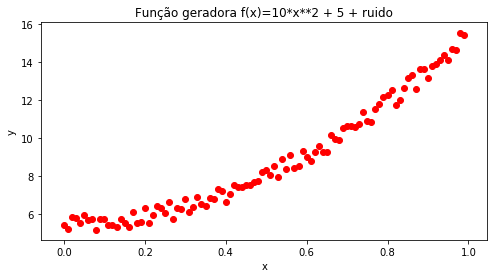

In [50]:
plt.figure(figsize=(8,4))
plt.xlabel('x')
plt.ylabel('y')
plt.title('Função geradora f(x)=10*x**2 + 5 + ruido')
# Plotar função geradora
plt.scatter(regressao_db,regressao_class, c="#ff0000")

<h5>Regressão Linear</h5>

In [51]:
class RegressaoLinear:
    __slots__ = ['w']
    
    def __init__(self):
        self.w = []
    
    def train(self, db, class_db, epocas=100,taxa_de_aprendizagem=0.01):
        self.w = np.random.random((1,db.shape[1] + 1))
        
        x = np.concatenate((db, np.ones((db.shape[0],1)) ), axis=1)
        new_db = pd.DataFrame(x)
        new_db.index = db.index
        matriz_inverse = np.linalg.inv(np.dot(new_db.T,new_db))
        x_T_y = np.dot(new_db.T , class_db)
        self.w = np.dot(matriz_inverse, x_T_y)
        
    def predict(self, linha):
        x = np.array(list(linha) + [1])
        return np.dot(x,self.w.T)

In [52]:
rl = RegressaoLinear()

In [53]:
test_model_regressao(rl, regressao_db, regressao_class)

'dado de indice 0 = 3.976958441140159, 30 = 6.899700530241711, valor da 90 = 12.745184708444818'

<h5>Regressão Linear com Kernel</h5>

In [67]:
class RegressaoLinearKernel:
    __slots__ = ['w','x_train', 'alfa']
    
    def __init__(self):
        self.w = []
        self.x_train = []
        self.alfa = []
    
    def train(self, db, class_db, epocas=100,taxa_de_aprendizagem=0.01, alfa=1):
        self.w = np.random.random((1,db.shape[1] + 1))
        self.alfa = alfa
        
        x = np.concatenate((db, np.ones((db.shape[0],1)) ), axis=1)
        new_db = pd.DataFrame(x)
        self.x_train = new_db
        kernel = []
        for i in range(new_db.shape[0]):
            linha_k = []
            for j in range(new_db.shape[0]):
                linha_k += [self.kernel_rbf(new_db.iloc[i], new_db.iloc[j], self.alfa)]
            kernel += [linha_k]
        
        matriz_kernel = np.array(kernel)
        
        matriz_inverse = np.linalg.inv(matriz_kernel)
        self.w = np.dot(matriz_inverse, class_db)
        
    def kernel_rbf(self,x,z,alfa):
        return np.exp(-(np.sqrt(np.sum((x-z)**2))/(2*(alfa**2))))
    
    def predict(self, linha):
        x = np.array(list(linha) + [1])
        linha_kernel = []
        for i in range(self.x_train.shape[0]):
            linha_kernel += [self.kernel_rbf(x,self.x_train.iloc[i], self.alfa)]
        
        kernel = np.array(linha_kernel)
        
        return np.dot(kernel,self.w.T)

In [68]:
rlk = RegressaoLinearKernel()

In [56]:
test_model_regressao(rlk, regressao_db, regressao_class)

'dado de indice 0 = 5.40403577458207, 30 = 6.801762934859028, valor da 90 = 13.163693208947137'

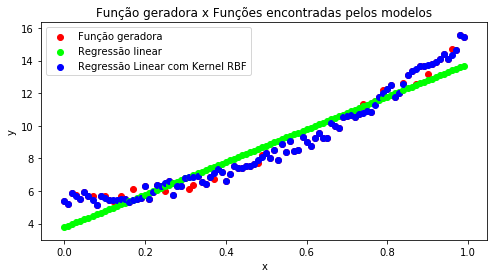

In [69]:
gerarGrafico(rl,rlk,regressao_db,regressao_class)